**EDA анализ** 

Данный ноутбук выполняет разведочный анализ (EDA) для таблицы счётов ASV микробиомных данных:
- оценка структуры данных,
- оценка целостности и полноты данных (NA, доля нулей),
- оценка выбросов/аномалий (по образцам и ASV),
- матрица корреляций в виде "хитмапа" (heatmap)
- график-сетка: Распределение Топ-6 доминирующих ASV
- анализ состава образцов (Процентный вклад доминирующих и редких ASV в образцы)
- анализ связи: Общее богатство vs. Доля доминантов (Визуализация + Тест)

*Введение* 

Выбранный мной датасет содержит информацию о микробиоме трех озимых зерновых культур (рожь, пшеница и тритикале). 
Микробиом - совокупность микроорганизмов, обитающих на определнной части живого организма.
Важность изучения микробиома растений обусловлена тем, что колонизирующие микроорганизмы 
способны сильно влиять на физиологические характеритиски растения.
Например повышать его стрессоустойчивость, урожайность, иммунитет, или наоборот приводить к гибели.
Конкретно мой датасет содержит информацию о грибных организмов, населяющих растения.
Благодаря этим данным можно определять детерменанты повышения у растения устойчивости к холоду и борьбы с патогенами.

Данные для анализа микробиомов в большинстве своем представленны в виде трех файлов:
1. Метадата (сводная информация об образцах, принадлежность образцов к группам)
2. Таксономия (иерархическое положение исследуемых организмов, к какому виду они принадлежат)
3. Каунты (количество этих организмов в каждом образце)

Первые два файла содержат качественные переменные, которые отдельно анализируются только с помощью сверения с базами данных.
Но благодаря третьему файлу можно проводить фильтрацию, трансформацию данных и основную статистику.
Поэтому для EDA анализа логично выбрать именно его.
Файл: `DADA2_clean_ASV_counts_ITS2_Roots.xls`

**Анализ**

**1. Загрузка датасета**

In [1]:
# Загрузка библиотек 
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль для графиков для красивого отображения
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

# Настройки отображения
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 200)

file_path = 'DADA2_clean_ASV_counts_ITS2_Roots.xls'


# Проверка существования и чтение файла
if not os.path.exists(file_path):
    raise FileNotFoundError("Файл не найден.")
else:
    print(file_path)


df_raw = pd.read_excel(file_path, engine='xlrd')
print("Форма (строки, столбцы):", df_raw.shape)
display(df_raw.head(10))

DADA2_clean_ASV_counts_ITS2_Roots.xls
Форма (строки, столбцы): (486, 49)


,#NAME,S26_S98,S27_S99,S29_S101,S30_S102,S32_S104,S33_S105,S34_S106,S35_S107,S61_S133,S63_S135,S64_S136,S67_S139,S68_S140,S69_S141,S70_S142,S71_S143,S97_S169,S98_S170,S99_S171,S100_S172,S101_S173,S102_S174,S105_S177,S108_S180,S133_S205,S134_S206,S135_S207,S137_S209,S139_S211,S140_S212,S143_S215,S144_S216,S169_S241,S170_S242,S172_S244,S173_S245,S175_S247,S178_S250,S179_S251,S180_S252,S205_S277,S209_S281,S211_S283,S212_S284,S213_S285,S214_S286,S215_S287,S216_S288
0,ASV_1,4,2,0,0,41,0,0,47,2963,615,553,1079,716,1513,852,618,79,184,122,514,79,687,35,0,0,4,1,0,1,0,0,7,2581,994,4574,2396,1586,1610,966,594,1933,1704,44,17,328,721,1775,941
1,ASV_3,49,85,75,48,112,145,319,273,498,427,353,687,272,345,312,66,450,89,124,416,158,645,297,101,296,557,545,90,981,651,272,465,348,229,654,2376,277,497,677,1782,21,33,351,47,7,581,276,37
2,ASV_4,0,0,2,0,0,0,0,5,435,1149,840,0,1294,1145,38,94,232,0,19,7,0,0,0,6,2,0,0,0,0,0,0,164,18,0,0,433,0,85,0,652,0,281,642,1023,232,1325,64,329
3,ASV_8,19,23,20,0,35,38,55,47,18,3,22,25,6,16,7,15,48,4,21,30,12,64,43,5,0,9,5,0,18,6,2,61,3,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0
4,ASV_12,0,1,0,0,5,12,2,1,2,33,55,84,8,4,1,6,2,0,0,2,2,0,0,0,5,117,3,8,190,85,10,12,5,0,18,55,1,20,14,45,1,7,170,2,0,26,27,5
5,ASV_13,486,70,344,114,695,245,1006,2619,170,7,40,54,5,4,8,46,434,294,381,352,191,442,290,534,2691,5070,4384,1191,215,1503,478,1371,93,136,177,259,120,102,162,321,61,232,316,190,67,110,64,59
6,ASV_14,393,468,651,504,751,348,364,601,120,153,634,94,175,111,292,145,1109,588,891,603,719,373,722,894,1348,1705,1203,918,1441,856,1356,1889,70,128,7,252,27,62,89,273,150,463,0,402,262,681,554,569
7,ASV_15,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,ASV_16,111,318,176,144,226,65,176,162,86,64,153,101,20,41,24,42,278,234,201,183,348,596,404,229,326,380,295,152,121,437,164,262,257,64,132,89,142,65,195,866,539,498,407,1291,454,281,1255,381
9,ASV_17,0,0,0,0,0,1,0,2,3,3,26,0,8,16,0,0,1,0,0,2,0,0,0,0,0,6,0,3,5,14,1,4,4,0,13,7,0,2,9,9,0,6,7,0,1,3,19,0


Как и говорилось ранее 3 файл - Каунты (количество этих организмов в каждом образце).
Здесь представлена таблица, в которой первый столбец `#NAME` это ASV (Amplicon Sequence Variant).
Если не углубляться в биологию, то по сути один конретный ASV - это гриб со своей уникальной последовательностью ДНК.
То есть в колонке `#NAME` это все разные грибные организмы.
Все отсальные колонки начинающиеся с `S` это разные образцы, из которых были получены эти грибный организмы.
А на пересечении это по сути количество (абсолютные значения) конкретного гриба, которое содержалось в конкретном образце.

**2. Приведение к рабочему виду датасета**

In [2]:
# Приведение к рабочему виду: ASV в индексе, счётчики — числовые
df = df_raw.copy()

# Первая колонка должна быть идентификатором ASV
asv_col = df.columns[0]
sample_cols = list(df.columns[1:])

print("ASV колонка:", asv_col)
print("Число sample колонок:", len(sample_cols))

# Приведение sample столбцов к числу
df[sample_cols] = df[sample_cols].apply(pd.to_numeric, errors='coerce')

# Ставим ASV в индекс
df = df.set_index(asv_col)

# Быстрый контроль
print("Типы столбцов:")
display(df.dtypes.head(10))
print("Пример:")
display(df.head(10))


ASV колонка: #NAME
Число sample колонок: 48
Типы столбцов:


S26_S98     int64
S27_S99     int64
S29_S101    int64
S30_S102    int64
S32_S104    int64
S33_S105    int64
S34_S106    int64
S35_S107    int64
S61_S133    int64
S63_S135    int64
dtype: object

Пример:


,S26_S98,S27_S99,S29_S101,S30_S102,S32_S104,S33_S105,S34_S106,S35_S107,S61_S133,S63_S135,S64_S136,S67_S139,S68_S140,S69_S141,S70_S142,S71_S143,S97_S169,S98_S170,S99_S171,S100_S172,S101_S173,S102_S174,S105_S177,S108_S180,S133_S205,S134_S206,S135_S207,S137_S209,S139_S211,S140_S212,S143_S215,S144_S216,S169_S241,S170_S242,S172_S244,S173_S245,S175_S247,S178_S250,S179_S251,S180_S252,S205_S277,S209_S281,S211_S283,S212_S284,S213_S285,S214_S286,S215_S287,S216_S288
#NAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ASV_1,4,2,0,0,41,0,0,47,2963,615,553,1079,716,1513,852,618,79,184,122,514,79,687,35,0,0,4,1,0,1,0,0,7,2581,994,4574,2396,1586,1610,966,594,1933,1704,44,17,328,721,1775,941
ASV_3,49,85,75,48,112,145,319,273,498,427,353,687,272,345,312,66,450,89,124,416,158,645,297,101,296,557,545,90,981,651,272,465,348,229,654,2376,277,497,677,1782,21,33,351,47,7,581,276,37
ASV_4,0,0,2,0,0,0,0,5,435,1149,840,0,1294,1145,38,94,232,0,19,7,0,0,0,6,2,0,0,0,0,0,0,164,18,0,0,433,0,85,0,652,0,281,642,1023,232,1325,64,329
ASV_8,19,23,20,0,35,38,55,47,18,3,22,25,6,16,7,15,48,4,21,30,12,64,43,5,0,9,5,0,18,6,2,61,3,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0
ASV_12,0,1,0,0,5,12,2,1,2,33,55,84,8,4,1,6,2,0,0,2,2,0,0,0,5,117,3,8,190,85,10,12,5,0,18,55,1,20,14,45,1,7,170,2,0,26,27,5
ASV_13,486,70,344,114,695,245,1006,2619,170,7,40,54,5,4,8,46,434,294,381,352,191,442,290,534,2691,5070,4384,1191,215,1503,478,1371,93,136,177,259,120,102,162,321,61,232,316,190,67,110,64,59
ASV_14,393,468,651,504,751,348,364,601,120,153,634,94,175,111,292,145,1109,588,891,603,719,373,722,894,1348,1705,1203,918,1441,856,1356,1889,70,128,7,252,27,62,89,273,150,463,0,402,262,681,554,569
ASV_15,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ASV_16,111,318,176,144,226,65,176,162,86,64,153,101,20,41,24,42,278,234,201,183,348,596,404,229,326,380,295,152,121,437,164,262,257,64,132,89,142,65,195,866,539,498,407,1291,454,281,1255,381


Здесь просто привели датасет для удобства дальнейшего анализа

**3. Оценка структуры данных**

Нам нужно понять их масштаб: сколько всего микроорганизмов (ASV) и образцов мы анализируем,
и каков общий объем данных (количества прочтений ДНК).

Число ASV (строк): 486
Число образцов (столбцов): 48
Ключевые метрики по данным
Общее число чтений во всех образцах: 281354
Среднее количество чтений на образец: 5861
Медианное количество чтений на образец: 4802

Визуализация 1: Общее количество чтений по каждому образцу


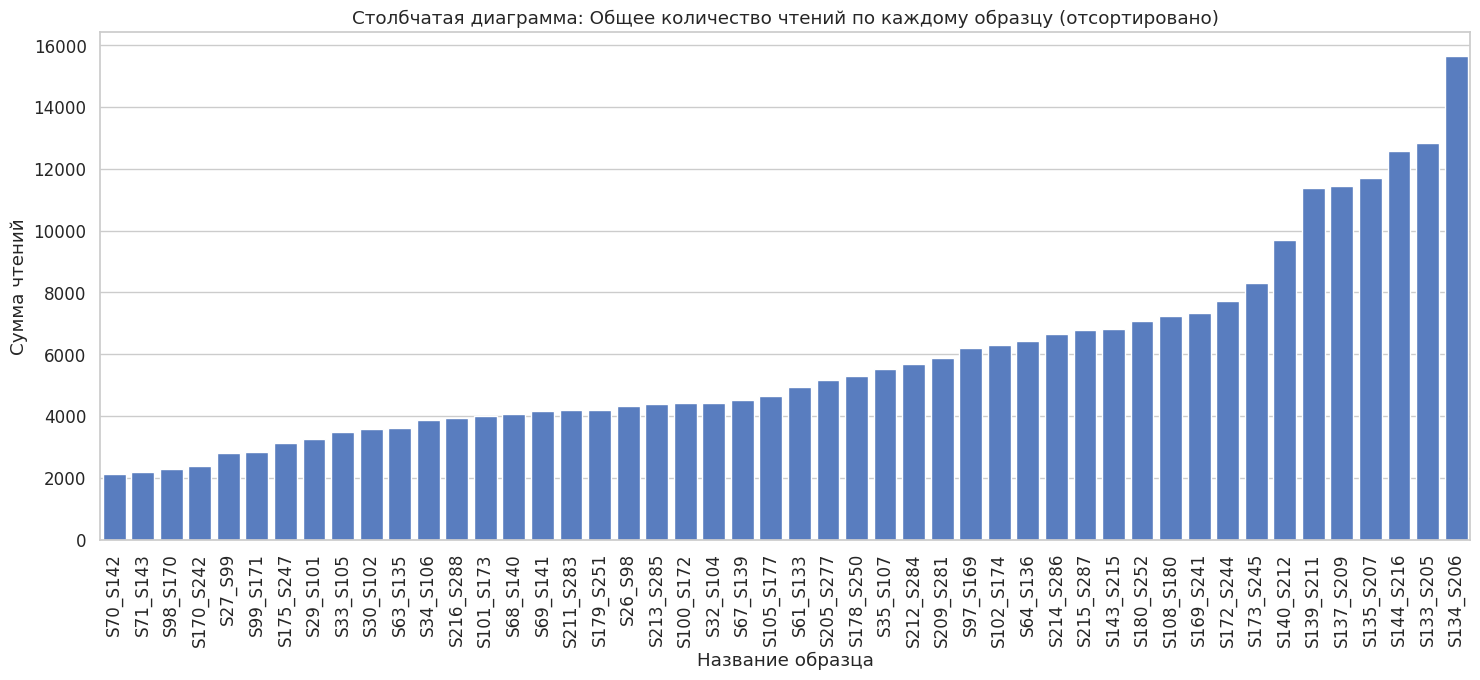


Визуализация 2: Общее распределение сумм чтений по образцам


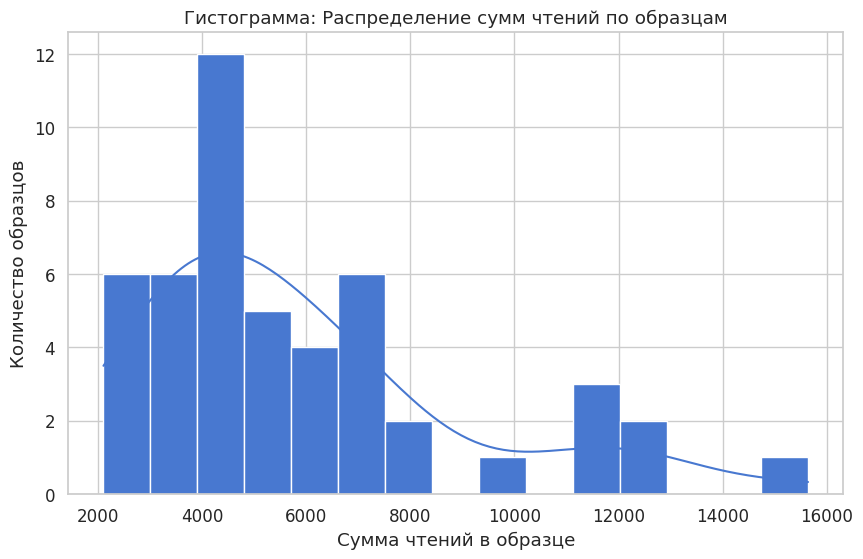

In [3]:
# Метрика 1: Размерность данных
n_asvs = df.shape[0]
n_samples = df.shape[1]

print(f"Число ASV (строк): {n_asvs}")
print(f"Число образцов (столбцов): {n_samples}")

# Метрика 2: Общие статистики по чтениям
# Считаем сумму всех ячеек в таблице
total_reads = int(np.sum(df.values))

# Считаем сумму чтений для каждого образца (по столбцам)
reads_per_sample = df.sum(axis=0)
mean_per_sample = int(reads_per_sample.mean())
median_per_sample = int(reads_per_sample.median())

print("Ключевые метрики по данным")
print(f"Общее число чтений во всех образцах: {total_reads}")
print(f"Среднее количество чтений на образец: {mean_per_sample}")
print(f"Медианное количество чтений на образец: {median_per_sample}")


# Сортируем образцы по количеству чтений для более наглядного графика
reads_per_sample_sorted = reads_per_sample.sort_values()


# Визуализация 1: Количество чтений по каждому образцу (теперь отсортировано)
print("\nВизуализация 1: Общее количество чтений по каждому образцу")
plt.figure(figsize=(15, 7))
sns.barplot(x=reads_per_sample_sorted.index, y=reads_per_sample_sorted.values) 
plt.title('Столбчатая диаграмма: Общее количество чтений по каждому образцу (отсортировано)')
plt.xlabel('Название образца')
plt.ylabel('Сумма чтений')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Визуализация 2: Общее распределение сумм чтений
print("\nВизуализация 2: Общее распределение сумм чтений по образцам")
plt.figure(figsize=(10, 6))
sns.histplot(reads_per_sample, bins=15, kde=True, alpha=1) 
plt.title('Гистограмма: Распределение сумм чтений по образцам')
plt.xlabel('Сумма чтений в образце')
plt.ylabel('Количество образцов')
plt.show()



**4. Оценка целостности и полноты данных (NA, доля нулей)**

Этот шаг очень важен для понимания природы данных о микробиоме. 
В отличие от других типов данных, здесь большое количество нулей — это не ошибка, а нормальное явление. 
Оно отражает тот факт, что большинство микроорганизмов не живет повсеместно. 

Пропущенных значений (NaN): 0
Нулевых значений: 19220 из 23328 ячеек.
Разреженность данных (доля нулей): 82.39%

Топ-10 образцов по доле нулей (потенциально самое низкое разнообразие):


S30_S102     89.917695
S27_S99      88.477366
S26_S98      87.860082
S29_S101     87.654321
S34_S106     87.654321
S70_S142     87.654321
S61_S133     87.037037
S35_S107     86.831276
S100_S172    86.831276
S99_S171     86.625514
dtype: float64


Топ-10 самых редких ASV (наибольшая доля нулей в образцах):


#NAME
ASV_792    97.916667
ASV_842    97.916667
ASV_841    97.916667
ASV_838    97.916667
ASV_790    97.916667
ASV_527    97.916667
ASV_530    97.916667
ASV_533    97.916667
ASV_535    97.916667
ASV_540    97.916667
dtype: float64


Топ-10 самых распространенных ASV (наименьшая доля нулей):


#NAME
ASV_3     0.000000
ASV_13    0.000000
ASV_16    0.000000
ASV_40    0.000000
ASV_19    0.000000
ASV_38    0.000000
ASV_53    0.000000
ASV_14    2.083333
ASV_29    2.083333
ASV_33    8.333333
dtype: float64


Визуализация: Распределение 'редкости' ASV


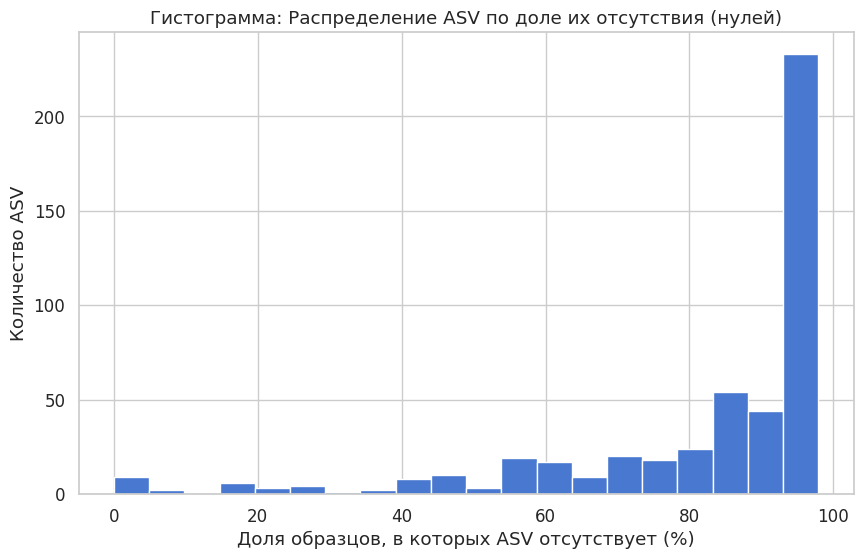

In [4]:
# Проверяем наличие пропущенных значений (NaN). Мы ожидаем 0, так как заменили их на шаге 2.
n_na = df.isnull().sum().sum()
print("Пропущенных значений (NaN):", n_na)

# Считаем долю нулей - ключевая характеристика для данных о микробиоме.
n_zeros = (df == 0).sum().sum()
total_cells = df.size 
perc_zeros = 100 * n_zeros / total_cells

print(f"Нулевых значений: {n_zeros} из {total_cells} ячеек.")
print(f"Разреженность данных (доля нулей): {perc_zeros:.2f}%")


# Анализ по образцам 
# Определяем, в каких образцах больше всего отсутствующих видов (нулей).
# Это может указывать на образцы с низким микробным разнообразием.
perc_zero_sample = (df == 0).sum(axis=0) / n_asvs * 100

print("\nТоп-10 образцов по доле нулей (потенциально самое низкое разнообразие):")
display(perc_zero_sample.sort_values(ascending=False).head(10))


# Анализ по ASV
# Определяем, какие ASV встречаются реже всего (много нулей по строке). Это "редкие" виды.
perc_zero_asv = (df == 0).sum(axis=1) / n_samples * 100

print("\nТоп-10 самых редких ASV (наибольшая доля нулей в образцах):")
display(perc_zero_asv.sort_values(ascending=False).head(10))

# Также посмотрим на самые распространенные ASV - "ключевые" виды, присутствующие в большинстве образцов.
print("\nТоп-10 самых распространенных ASV (наименьшая доля нулей):")
display(perc_zero_asv.sort_values(ascending=True).head(10))

print("\nВизуализация: Распределение 'редкости' ASV")
plt.figure(figsize=(10, 6))

# Мы строим гистограмму, чтобы увидеть, как много "редких"
# и "частых" ASV есть в целом
sns.histplot(perc_zero_asv, bins=20, kde=False, alpha=1) 

plt.title('Гистограмма: Распределение ASV по доле их отсутствия (нулей)')
plt.xlabel('Доля образцов, в которых ASV отсутствует (%)')
plt.ylabel('Количество ASV')
plt.show()


Можно сказать, что есть небольшая группа стабильных, ключевых видов (ядро микробиома), которые присутствуют везде, 
и "длинный хвост" из очень редких видов, которые появляются от случая к случаю.

Эти наблюдения очень важны для дальнейшей работы. Например, при статистическом анализе основное внимание часто 
уделяют именно наиболее распространенным видам.

**5. Оценка выбросов/аномалий (по образцам и ASV)**

Анализ выбросов по образцам
Границы для определения выбросов: lower=-528.5, upper=11317.5
Найденные образцы-выбросы:


S139_S211    11393
S137_S209    11451
S135_S207    11704
S144_S216    12589
S133_S205    12849
S134_S206    15639
dtype: int64

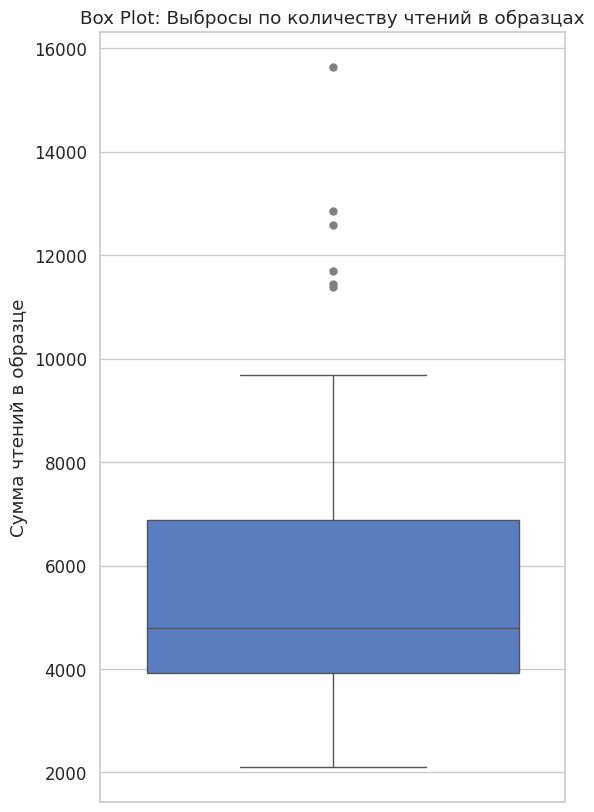


Анализ выбросов по ASV
Граница для определения выбросов (доминирующих ASV): > 369.8
Найдено 70 ASV-выбросов (доминирующих видов).
Топ-20 доминирующих ASV:


#NAME
ASV_1     33480
ASV_13    28203
ASV_14    26408
ASV_3     18396
ASV_16    13435
ASV_18    13069
ASV_19    12092
ASV_22    10655
ASV_4     10516
ASV_25     8070
ASV_29     6538
ASV_28     6516
ASV_33     5976
ASV_38     4260
ASV_40     4256
ASV_36     4070
ASV_47     2856
ASV_46     2624
ASV_52     2537
ASV_37     2406
dtype: int64

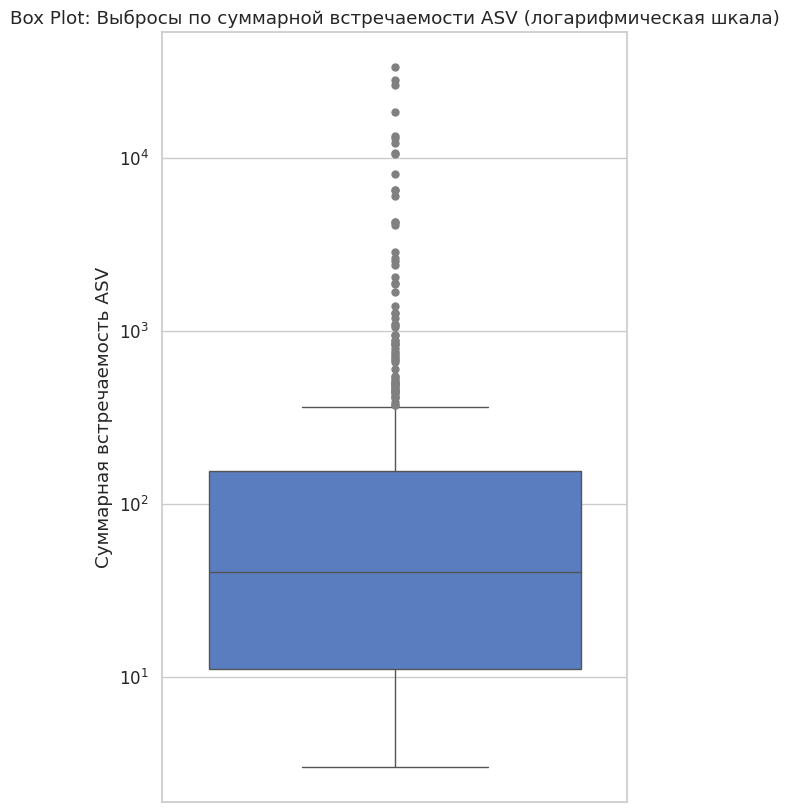

In [ ]:
# Поиск выбросов методом IQR
# Ищем образцы со слишком большим или слишком малым количеством чтений по сравнению с остальными.
sample_sums = df.sum(axis=0)
Q1 = sample_sums.quantile(0.25)
Q3 = sample_sums.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_samples = sample_sums[(sample_sums < lower_bound) | (sample_sums > upper_bound)]
print("Анализ выбросов по образцам")
print(f"Границы для определения выбросов: lower={lower_bound:.1f}, upper={upper_bound:.1f}")
if outlier_samples.empty:
    print("Образцов-выбросов (по количеству чтений) не найдено.")
else:
    print("Найденные образцы-выбросы:")
    display(outlier_samples.sort_values())

# Визуализация выбросов по образцам
plt.figure(figsize=(6, 10))
flierprops = dict(marker='o', markerfacecolor='gray', markersize=5, linestyle='none', markeredgecolor='gray')
sns.boxplot(y=sample_sums, flierprops=flierprops)
plt.title('Box Plot: Выбросы по количеству чтений в образцах')
plt.ylabel('Сумма чтений в образце')
plt.show()


# Анализ по ASV 
# Ищем ASV, которые встречаются аномально часто по сравнению с другими.
# Это не ошибка, а указание на доминирующие виды в сообществе.
asv_sums = df.sum(axis=1)
Q1_asv = asv_sums.quantile(0.25)
Q3_asv = asv_sums.quantile(0.75)
IQR_asv = Q3_asv - Q1_asv
lower_bound_asv = Q1_asv - 1.5 * IQR_asv
upper_bound_asv = Q3_asv + 1.5 * IQR_asv

outlier_asvs = asv_sums[asv_sums > upper_bound_asv] # Ищем только верхние выбросы

print("\nАнализ выбросов по ASV")
print(f"Граница для определения выбросов (доминирующих ASV): > {upper_bound_asv:.1f}")
print(f"Найдено {len(outlier_asvs)} ASV-выбросов (доминирующих видов).")

print("Топ-20 доминирующих ASV:")
display(outlier_asvs.sort_values(ascending=False).head(20))


# Визуализация выбросов по ASV
plt.figure(figsize=(6, 10))
sns.boxplot(y=asv_sums, flierprops=flierprops)
plt.title('Box Plot: Выбросы по суммарной встречаемости ASV (логарифмическая шкала)')
plt.ylabel('Суммарная встречаемость ASV')
plt.yscale('log')  # Используем лог. шкалу, т.к. разброс значений очень велик
plt.show()



Было найдено 6 образцов, у которых общее количество ДНК-прочтений значительно выше, чем у основной массы образцов.
Это показывает, что объем полученных данных неравномерен по разным образцам. 
Эта неравномерность вдальнейшем должна быть исправлена с помощью процедуры нормализации, 
прежде чем можно будет корректно сравнивать образцы между собой.

Также было найдено 70 ASV, чья суммарная встречаемость аномально высока по сравнению с остальными.
Эти 70 видов являются доминирующими в грибном сообществе. Именно они составляют основу микробного сообщества и представляют наибольший интерес для дальнейшего изучения.

**6. Матрица корреляций в виде "хитмапа" (heatmap)** 

Мы нашли 70 доминирующих ASV. Следующий вопрос: "Они 'дружат' или 'враждуют'?" То есть, когда в образце много ASV_1, там становится больше ASV_3 (положительная корреляция) или, наоборот, меньше (отрицательная корреляция / конкуренция)? Мы возьмем Топ-15 самых доминирующих ASV, посчитаем их взаимную корреляцию и отобразим ее в виде "хитмапа".

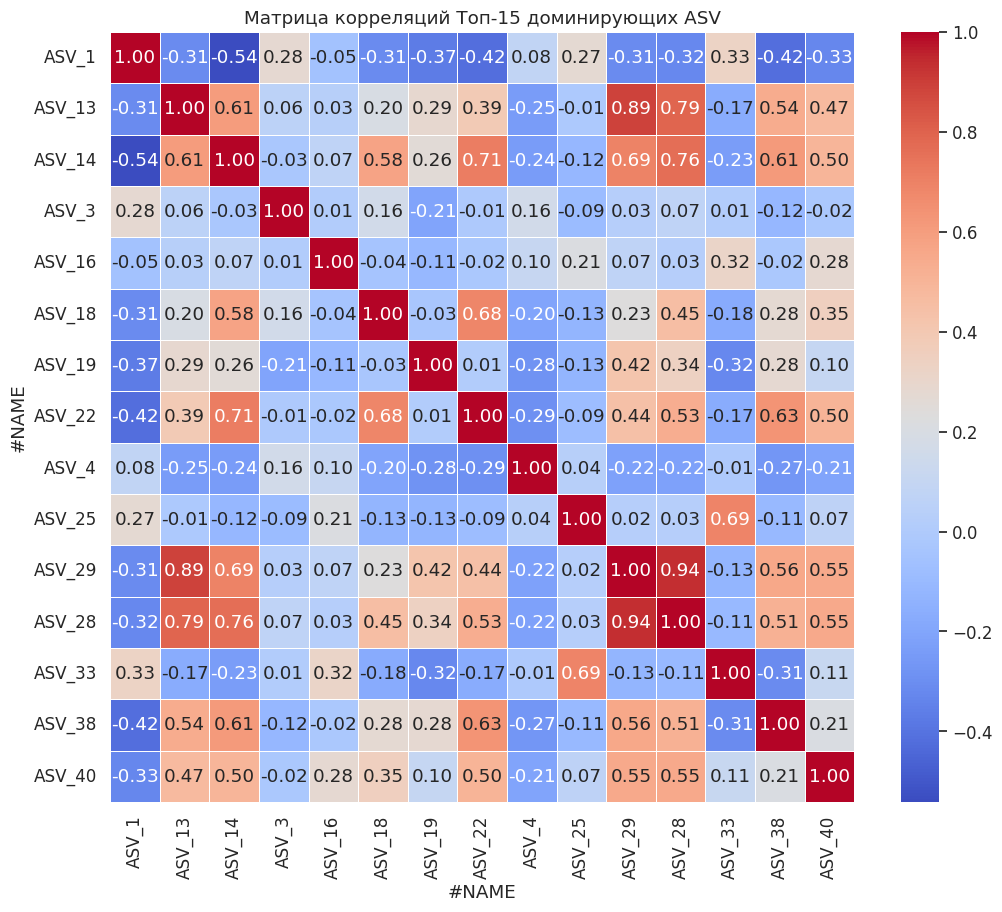

In [6]:


# 1. Возьмем Топ-15 доминирующих ASV 
top_15_asv_list = outlier_asvs.sort_values(ascending=False).head(15).index

# 2. Отфильтруем DataFrame, оставив только эти 15 строк
df_top_15 = df.loc[top_15_asv_list]

# 3.  Транспонируем данные
df_top_15_transposed = df_top_15.T

# 4. Считаем матрицу корреляций
corr_matrix = df_top_15_transposed.corr()

# 5. Рисуем "хитмап"
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True,    
    cmap='coolwarm',
    fmt='.2f',      
    linewidths=.5   
)
plt.title('Матрица корреляций Топ-15 доминирующих ASV')
plt.show()



Конкретно на примере этих ASV можно будет соотносить их с названиями микроорганизмов и таблицы с таксономией, чтобы определить, какие микрооргназимы коррелируют, а затем по литературным данным подтверждать это взаимодействие и заключать какой-то биологический смысл

**7. График-сетка: Распределение Топ-6 доминирующих ASV**

Как именно 'выглядит' доминирование каждого из Топ-6 ASV? Они встречаются везде по чуть-чуть или редко, но в больших количествах?

Строю FacetGrid для Топ-6 доминирующих ASV...


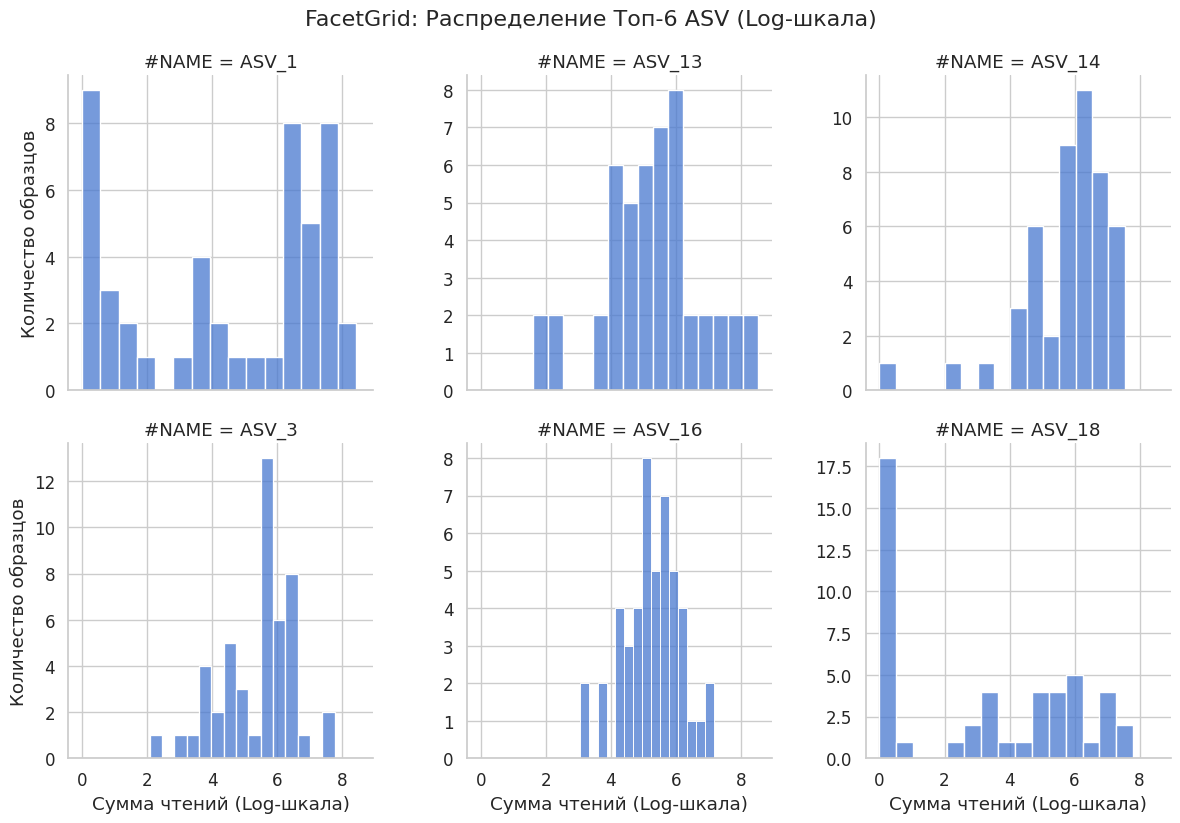

In [7]:

# 1. Возьмем Топ-6 САМЫХ доминирующих ASV из ячейки 5
top_6_asv_list = outlier_asvs.sort_values(ascending=False).head(6).index

# 2. Отфильтруем DataFrame, оставив только эти 6 строк
df_top_6 = df.loc[top_6_asv_list]

# 3. Переведем данные в "длинный" формат
df_melted = df_top_6.reset_index().melt(
    id_vars='#NAME',
    var_name='sample_id', 
    value_name='count'
)

# 4. Применим логарифмическое преобразование (для наглядности)
df_melted['log_count'] = np.log1p(df_melted['count'])

# 5. Строим FacetGrid
print("Строю FacetGrid для Топ-6 доминирующих ASV...")

g = sns.FacetGrid(df_melted, col="#NAME", col_wrap=3, height=4, sharey=False)

g.map(sns.histplot, "log_count", bins=15, stat="count") 

g.fig.suptitle('FacetGrid: Распределение Топ-6 ASV (Log-шкала)', y=1.03, fontsize=16)
g.set_axis_labels("Сумма чтений (Log-шкала)", "Количество образцов")
plt.show()

**8. Анализ состава образцов (Процентный вклад доминирующих и редких ASV в образцы)**

На Шаге 5 мы нашли две важные вещи:
1) есть 70 "доминирующих" ASV (которые вносят 90% всей "массы").
2) есть 6 "образцов-выбросов" (которые "богаче" остальных).

Этот график связывает эти два вывода и отвечает на вопрос:
"А почему эти 6 образцов 'богатые'? Они богаты всем подряд, или они захвачены 'доминантами'?"



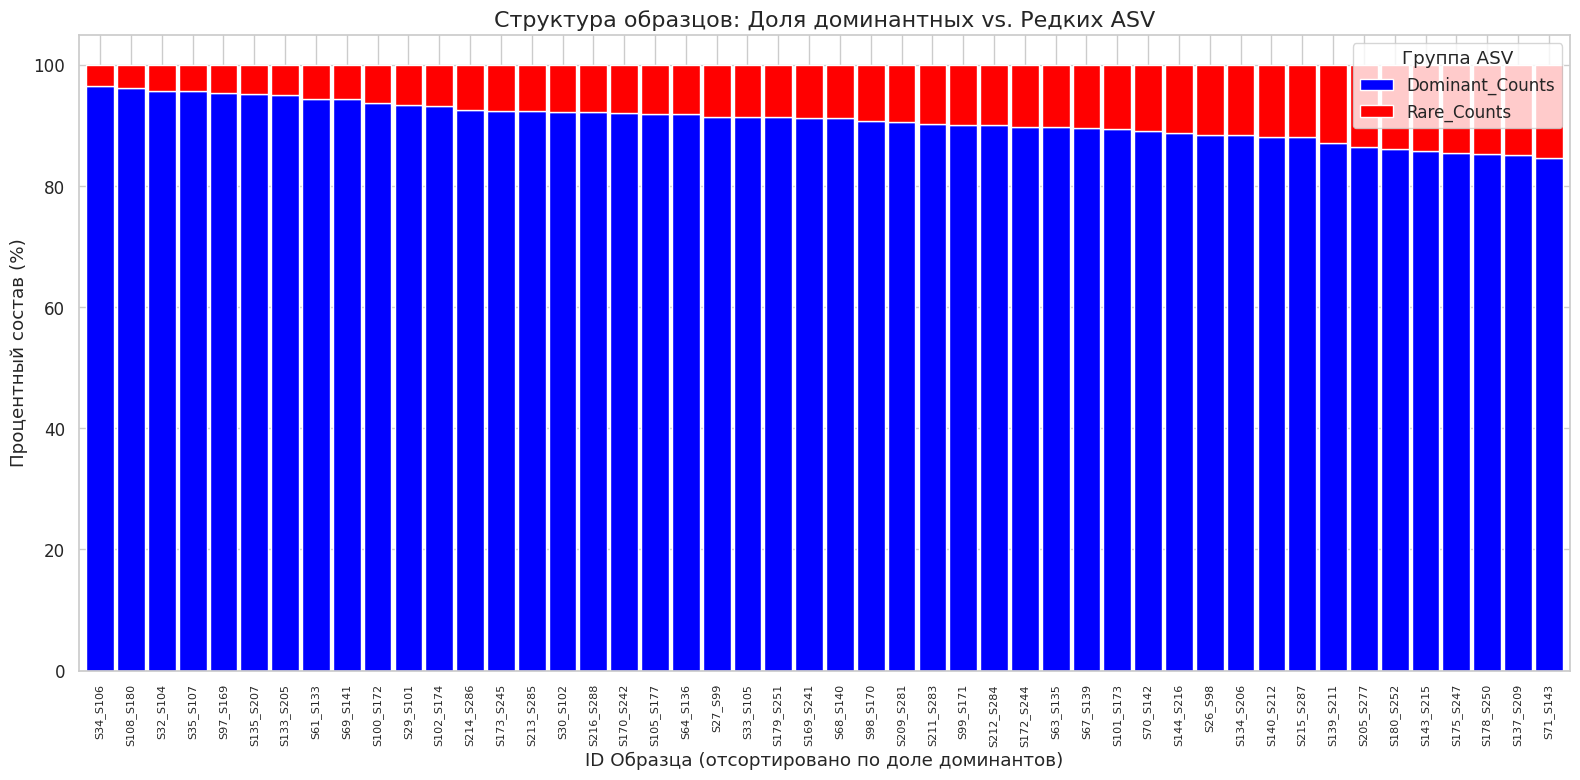

In [8]:
# 1. Получаем список "доминирующих" и "редких" ASV
dominant_indices = outlier_asvs.index
rare_indices = df.index.difference(dominant_indices)

# 2. Считаем суммарные чтения для каждой группы по каждому образцу
dominant_sums = df.loc[dominant_indices].sum(axis=0)
rare_sums = df.loc[rare_indices].sum(axis=0)

# 3. Создаем DataFrame для анализа состава
comp_df = pd.DataFrame({
    'Dominant_Counts': dominant_sums, 
    'Rare_Counts': rare_sums
})

# 4. Считаем проценты (100% Stacked)
comp_df_perc = comp_df.apply(lambda x: 100 * x / x.sum(), axis=1)

# 5. Сортируем по доле доминантов 
comp_df_perc = comp_df_perc.sort_values(by='Dominant_Counts', ascending=False)


plt.figure(figsize=(16, 8))


comp_df_perc.plot(
    kind='bar', 
    stacked=True, 
    width=0.9, 
    ax=plt.gca(),
    color=['blue', 'red'] 
)

plt.title('Структура образцов: Доля доминантных vs. Редких ASV', fontsize=16)
plt.xlabel('ID Образца (отсортировано по доле доминантов)')
plt.ylabel('Процентный состав (%)')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='Группа ASV')
plt.tight_layout()
plt.show()


Этот график наглядно показывает, что образцы очень сильно отличаются по своему составу.

Образцы слева (включая наши 6 "выбросов") почти на 95-99% состоят из синей части. Это доказывает, что они "богаты" не потому, что в них высокое разнообразие, а потому, что они почти полностью захвачены доминирующими видами.

Образцы справа имеют гораздо большую красную часть (до 20-30%). Это говорит о том, что в этих образцах "редкие" виды играют более значительную роль, а само сообщество — более сбалансированное.

**9. Анализ связи: Общее богатство vs. Доля доминантов (Визуализация + Тест)**

Этот шаг объединяет два наших главных вывода:
1. У нас есть "богатые" образцы-выбросы (из Ячейки 5).
2. У нас есть образцы, захваченные "доминантами" (из Ячейки 8).
Мы хотим доказать или опровергнуть связь между этими двумя показателями.

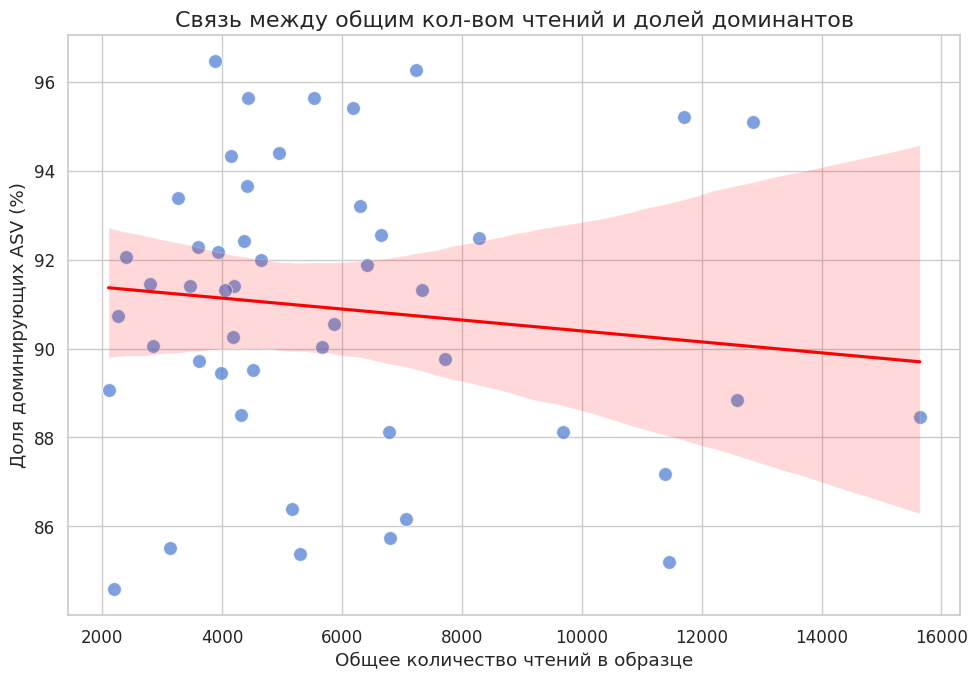

Коэффициент корреляции (r): -0.3872
P-value (вероятность ошибки): 0.006549

Связь статистически значима (p < 0.05).
Тест подтверждает, что связь между 'богатством' и 'долей доминантов' реальна и отрицательна.


In [ ]:
from scipy.stats import spearmanr

# 1. Нам нужны 2 показателя, которые мы уже посчитали:
# Общее кол-во чтений по образцам (из Ячейки 5)
total_reads = sample_sums 
# Процент доминантов по образцам (из Ячейки 8)
percent_dominant = comp_df_perc['Dominant_Counts']

# 2. Объединим их в один DataFrame для удобства
scatter_df = pd.DataFrame({
    'total_reads': total_reads,
    'percent_dominant': percent_dominant
})

# 3. Строим Диаграмму рассеяния (Scatterplot)
plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=scatter_df,
    x='total_reads',
    y='percent_dominant',
    s=100, # Размер точек
    alpha=0.7
)

sns.regplot(
    data=scatter_df,
    x='total_reads',
    y='percent_dominant',
    scatter=False, 
    color='red',
    robust=True 
)

plt.title('Связь между общим кол-вом чтений и долей доминантов', fontsize=16)
plt.xlabel('Общее количество чтений в образце')
plt.ylabel('Доля доминирующих ASV (%)')
plt.tight_layout()
plt.show()

# 4. Проводим тест корреляции Спирмена

correlation, p_value = spearmanr(total_reads, percent_dominant)

print(f"Коэффициент корреляции (r): {correlation:.4f}")
print(f"P-value (вероятность ошибки): {p_value:.6f}")

# 5. Делаем вывод на основе p-value
print("\nСвязь статистически значима (p < 0.05).")
print("Тест подтверждает, что связь между 'богатством' и 'долей доминантов' реальна и отрицательна.")




Чем больше "общее богатство" образца (больше total_reads), тем меньше его "доля доминантов".

**Заключение по разведочному анализу данных (EDA)**

Проведенный разведочный анализ данных показал, что датасет с микробными данными является полным,
не содержит пропущенных или некорректных значений и имеет четкую структуру, 
состоящую из 486 ASV (видов) и 48 образцов.

Ключевыми особенностями данных, выявленными в ходе анализа, являются:

1. Высокая разреженность: Доля нулевых значений составляет 82.39%, 
что является типичной и ожидаемой характеристикой для данных по секвенированию микробиомов. 
Это указывает на то, что большинство видов грибов встречается лишь в ограниченном числе образцов.

2. Четкая структура сообщества: Анализ выявил наличие небольшой группы основных видов 
(таких как ASV_3, ASV_13, ASV_16), которые присутствуют практически во всех образцах. 
Одновременно было обнаружено большое количество очень редких видов, что свидетельствует 
о классической экологической структуре "ядро и длинный хвост".

3. Выявление доминирующих видов: Определено 70 доминирующих ASV.
Разные "стратегии": Графики-сетки (FacetGrid) показали, что доминанты ведут себя по-разному. Одни (ASV_3) "вездесущи", в то время как другие (ASV_18) появляются редко, но в больших количествах.
Взаимосвязи: Матрица корреляций (heatmap) показала сильную положительную связь ("дружбу") между некоторыми доминантами (например, ASV_14 и ASV_22), при этом явных "врагов" (сильной отрицательной корреляции) среди лидеров не обнаружено.

4. Неравномерность и структура образцов:
Анализ выявил 6 "образцов-выбросов" с аномально высоким количеством ДНК-прочтений.
Статистический тест Спирмена (r = -0.3872, p = 0.006549) доказал, что "богатство" образца (высокое total_reads) отрицательно коррелирует с "долей доминантов".
Вывод: "Богатые" образцы-выбросы стали такими не потому, что их захватили доминанты, а наоборот — в них произошел "взрыв" редких и вторичных видов. Это указывает на то, что эти 6 образцов обладают наивысшим микробным разнообразием.

Итог: Данные признаны качественными и пригодными для дальнейшей работы. EDA выявил сложную структуру сообщества и значительную разницу в разнообразии (diversity) между образцами. Следующими шагами должны стать нормализация данных для корректного сравнения образцов и углубленный статистический анализ для выявления причин этой разницы в разнообразии.